In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_load = "data/city_data.csv"
ride_data_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_load)
#city_data = city_data.drop_duplicates('city')
ride_data = pd.read_csv(ride_data_load)

# Combine the data into a single dataset
city_ride_data = city_data.merge(ride_data, on = 'city')

# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

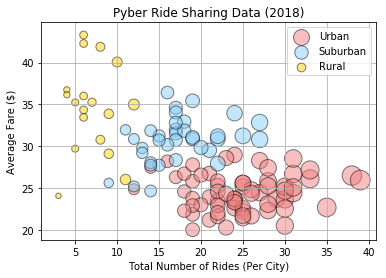

In [2]:
#separate data frames for types of city
urban_type = city_ride_data.loc[(city_ride_data["type"] == "Urban")]
rural_type = city_ride_data.loc[(city_ride_data["type"] == "Rural")]
suburban_type = city_ride_data.loc[(city_ride_data["type"] == "Suburban")]

# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
urban_average_fare = urban_type.groupby(["city"])["fare"].mean()
urban_total_rides = urban_type.groupby(["city"]).count()["ride_id"]
urban_total_drivers = urban_type.groupby(["city"])["driver_count"].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
suburban_average_fare = suburban_type.groupby(["city"])["fare"].mean()
suburban_total_rides = suburban_type.groupby(["city"]).count()["ride_id"]
suburban_total_drivers = suburban_type.groupby(["city"])["driver_count"].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
rural_average_fare = rural_type.groupby(["city"])["fare"].mean()
rural_total_rides = rural_type.groupby(["city"]).count()["ride_id"]
rural_total_drivers = rural_type.groupby(["city"])["driver_count"].value_counts()

#build out the scatter plot for each type of city

#urban scatter
plt.scatter(urban_total_rides, urban_average_fare, marker="o", facecolors="lightcoral", 
            edgecolors="black", s=urban_total_drivers*10, alpha = 0.5, label = "Urban")
#suburban scatter
plt.scatter(suburban_total_rides, suburban_average_fare, marker="o", facecolors="lightskyblue", 
            edgecolors="black", s=suburban_total_drivers*10, alpha = 0.5, label = "Suburban")
#rural scatter
plt.scatter(rural_total_rides, rural_average_fare, marker="o", facecolors="gold", 
            edgecolors="black", s=rural_total_drivers*10, alpha = 0.5, label = "Rural")

#make plot pretty
plt.grid()
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc = 'upper right')

#show plot
plt.savefig("Images/Pyber Ride Sharing Data (2018).png")
plt.show()

## Total Fares by City Type

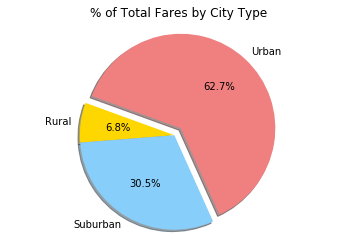

In [3]:
#total fares
total_fare = city_ride_data.groupby(["type"])["fare"].sum()

labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

## Total Rides by City Type

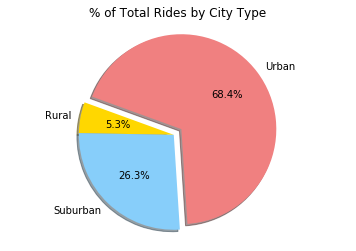

In [4]:
# Calculate Total Fare by City Type
total_rides = city_ride_data.groupby(['type'])['ride_id'].count()

labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()


## Total Drivers by City Type

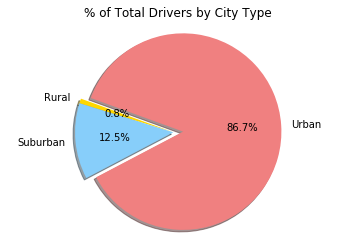

In [5]:
# Calculate Total Drivers by City Type
total_drivers = city_ride_data.groupby(['type'])['driver_count'].sum()

labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()